<a href="https://colab.research.google.com/github/satyasatti/Machinelearning/blob/master/Predict_No_of_votes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  <font color = 'red'/> Problem Statement

#### Predict number of upvotes

Crowdsourced online content platforms have a constant need to identify the best content in time to appropriately promote and thereby improve the engagement at the website. This challenge involves a similar problem of predicting the upvote count for a queries posted and identify the parameters that affect it the most.



In [0]:
# Load Libraries

import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from pandas import set_option
from pandas import get_dummies
from pandas import concat
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Load the data

In [0]:
filename = 'train_NIR5Yl1.csv'
dataset = read_csv('drive/My Drive/Projects/Predict no of #upvotes/Data/'+filename)

### Analyse the data

In [0]:
dataset.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


### Descriptive Statistics

In [0]:
# Shape
print(dataset.shape)

(330045, 7)


In [0]:
print(dataset.dtypes)

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object


In [0]:
np.unique(np.array(dataset.ID)).size

330045

In [0]:
data = dataset.drop('ID',axis=1)

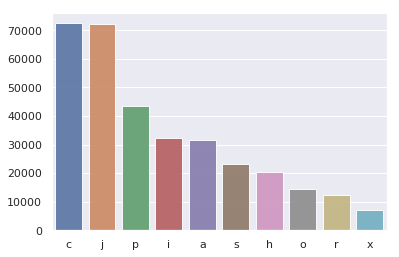

In [0]:
import seaborn as sns

tag_counts = data.Tag.value_counts()

sns.set(style='darkgrid')

sns.barplot(tag_counts.index,tag_counts.values,alpha=0.9)

plt.show()

In [0]:
sns.pieplot(tag_counts.index,tag_counts.values)

AttributeError: ignored

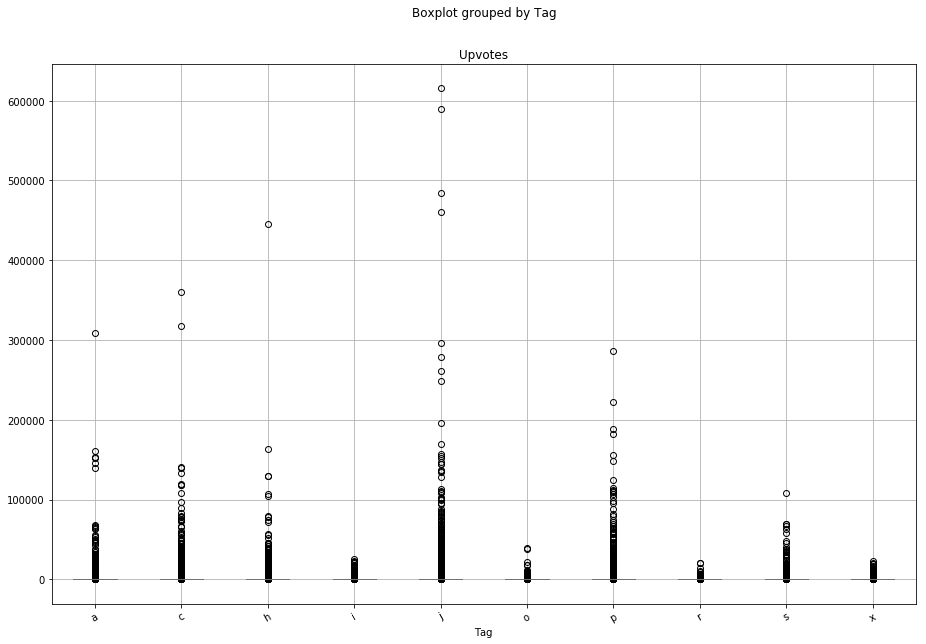

In [0]:
data.boxplot('Upvotes','Tag',rot = 30,figsize=(15,10))

In [0]:
#tag_c = get_dummies(data.Tag)
#data = concat([data,get_dummies(data.Tag)],axis=1)
#LabelEncoder.fit_transform(data.Tag.values)
le = LabelEncoder()
le.fit(data.Tag.values)
data['Tag_e'] = le.transform(data.Tag.values)

In [0]:
data = data.drop('Tag',axis=1)

In [0]:
data.dtypes

Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
Tag_e           int64
dtype: object

In [0]:
data.head()

,Reputation,Answers,Username,Views,Upvotes,Tag_e
0,3942.0,2.0,155623,7855.0,42.0,0
1,26046.0,12.0,21781,55801.0,1175.0,0
2,1358.0,4.0,56177,8067.0,60.0,1
3,264.0,3.0,168793,27064.0,9.0,0
4,4271.0,4.0,112223,13986.0,83.0,1


In [0]:
# descriptions 
set_option('precision', 1) 
print(data.describe())


       Reputation   Answers  Username    Views   Upvotes     Tag_e
count     3.3e+05  330045.0  330045.0  3.3e+05  330045.0  330045.0
mean      7.8e+03       3.9   81442.9  3.0e+04     337.5       3.5
std       2.7e+04       3.6   49215.1  8.1e+04    3592.4       2.5
min       0.0e+00       0.0       0.0  9.0e+00       0.0       0.0
25%       2.8e+02       2.0   39808.0  2.6e+03       8.0       1.0
50%       1.2e+03       3.0   79010.0  9.0e+03      28.0       4.0
75%       5.1e+03       5.0  122559.0  2.7e+04     107.0       6.0
max       1.0e+06      76.0  175738.0  5.2e+06  615278.0       9.0


In [0]:
# Correlation
set_option('precision',2)
print(data.corr())

            Reputation  Answers  Username     Views   Upvotes     Tag_e
Reputation        1.00     0.07 -4.10e-02  3.65e-02  2.67e-01 -2.40e-02
Answers           0.07     1.00 -1.22e-02  4.99e-01  2.02e-01 -6.47e-02
Username         -0.04    -0.01  1.00e+00  2.31e-03 -1.20e-02  1.26e-02
Views             0.04     0.50  2.31e-03  1.00e+00  4.37e-01 -1.18e-02
Upvotes           0.27     0.20 -1.20e-02  4.37e-01  1.00e+00 -4.30e-03
Tag_e            -0.02    -0.06  1.26e-02 -1.18e-02 -4.30e-03  1.00e+00


### Data Visulizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f259d2b9780>,
      dtype=object)

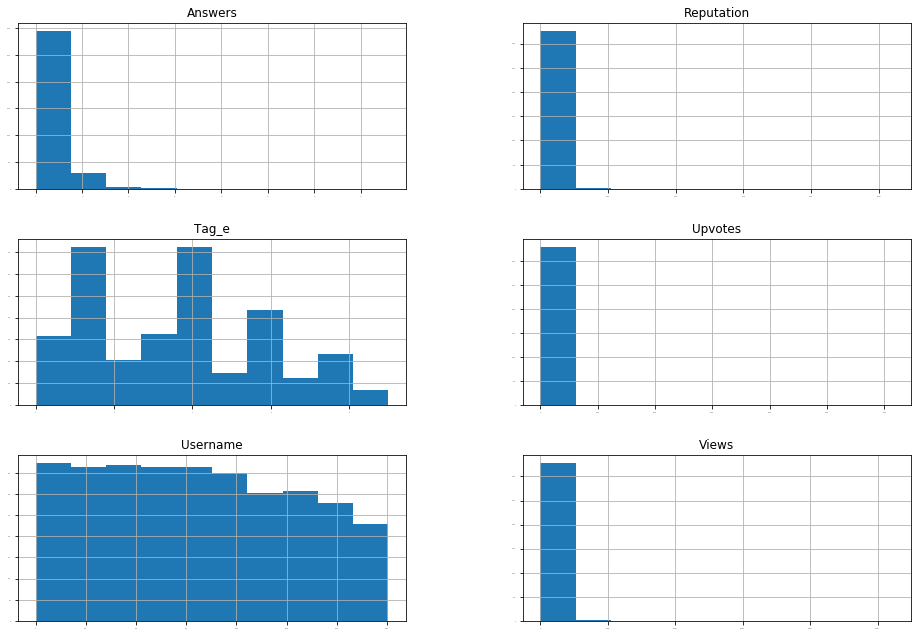

In [0]:
# Histograms
data.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1,figsize=(16,11))

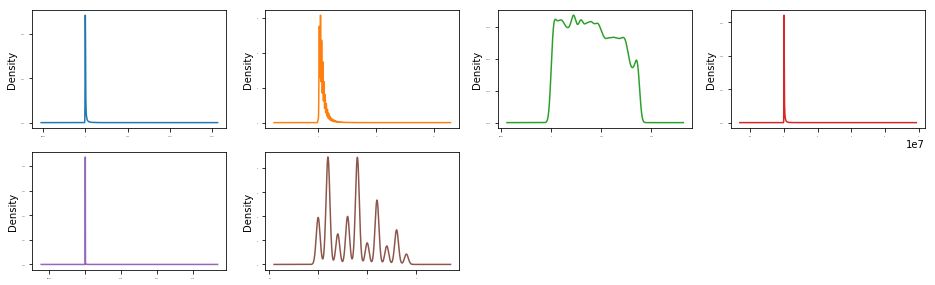

In [0]:
# Density
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,legend=False,fontsize=1,figsize=(16,10))
plt.show()

ID               AxesSubplot(0.125,0.125;0.110714x0.755)
Reputation    AxesSubplot(0.257857,0.125;0.110714x0.755)
Answers       AxesSubplot(0.390714,0.125;0.110714x0.755)
Username      AxesSubplot(0.523571,0.125;0.110714x0.755)
Views         AxesSubplot(0.656429,0.125;0.110714x0.755)
Upvotes       AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

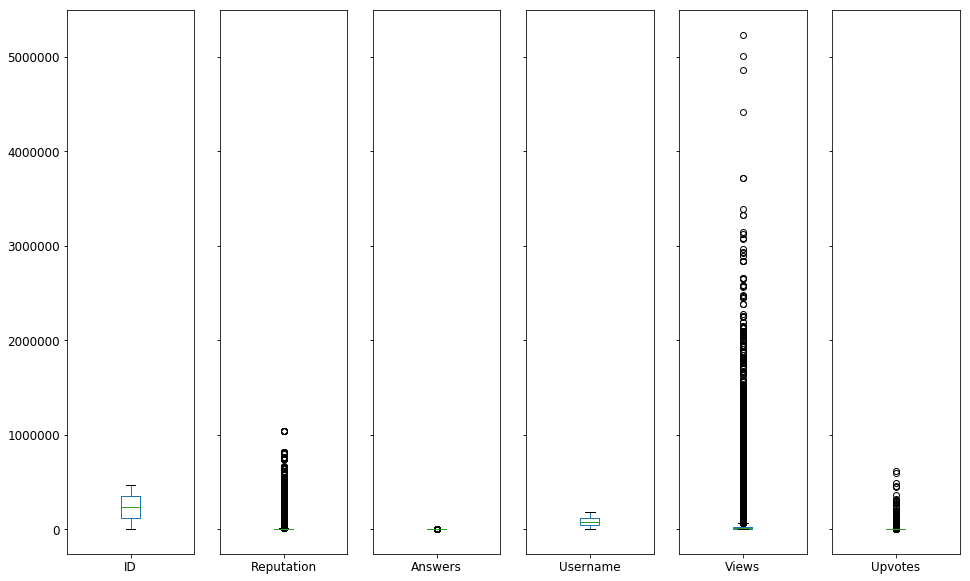

In [0]:
# Box and Whisker Plots
dataset.plot(kind='box',subplots=True,sharex=False,sharey=True,fontsize=12,figsize=(16,10))

### Multi Modal Visulizations

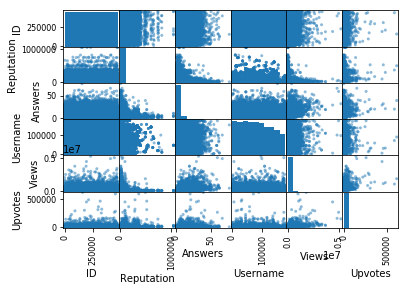

In [0]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

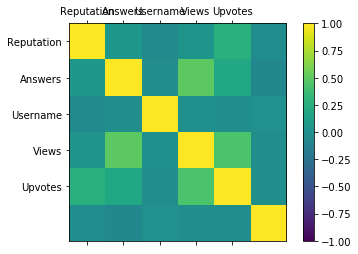

In [0]:
# correlation matrix

fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
ticks = np.arange(0,5,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(data.columns) 
ax.set_yticklabels(data.columns)
plt.show()


### Validation dataset

In [0]:
#split out validation dataset
array = data.values
X = data.drop('Upvotes',axis=1)
y = data['Upvotes']
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y,test_size = validation_size,random_state=seed)


### Evaluate Algorithms Baseline

In [0]:
# test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'


- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN). 

- Nonlinear Algorithms: Classification and Regression


In [0]:
# Sport check Algos
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('CART',DecisionTreeRegressor()))
#models.append(('SR',SVR()))

In [0]:
# Evaluate each model in turn
results = []
names = []
for name,model in models:
    Kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=Kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f %f" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: -9055796.011263 4621634.353893
LASSO: -9055796.562779 4621681.677219
EN: -9055722.593255 4622417.567976
CART: -3112906.466092 2564848.598488


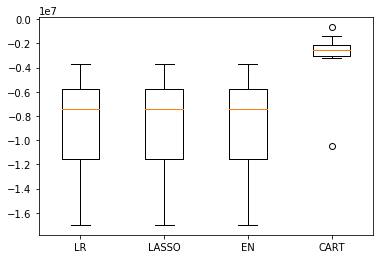

In [0]:
# compare Algorithms
fig = plt.figure()
#fig.subtitle('Algorithm comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


From above we can see that non linear algos working well . Less dispersion and less error

###  Evaluate Algorithms: Standardization

In [0]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())]))) 
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())]))) 
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

results = []
names =[]

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds,random_state=seed)
  cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print((name),cv_results.mean(),cv_results.std())



ScaledLR -9055796.011262896 4621634.35389252
ScaledLASSO -9055805.077074783 4622602.732696251
ScaledEN -9427848.099815521 4941490.089361121
ScaledKNN -3409237.4099471704 1576025.8400596492
ScaledCART -2983168.8357810327 2416023.906429576


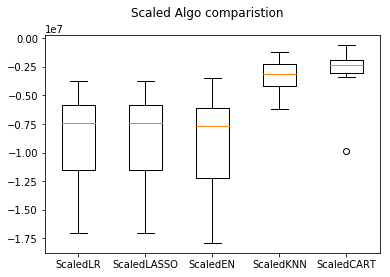

In [0]:
# Compare Algoritms
fig = plt.figure()
fig.suptitle('Scaled Algo comparistion')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Improve results with Tuning

In [0]:
# Improve results with Tuning

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
sample_split_range = [2,6,10,20,30,50]
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = []
param_grid.append(dict(min_samples_split=sample_split_range))
param_grid.append(dict(min_samples_leaf = num_leafs))
#param_grid.append(dict(criterion = ['gini','entropy']))
model = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params): 
  print("%f (%f) with: %r" % (mean, stdev, param))





Best: -2678722.504767 using {'min_samples_leaf': 5}
-2999993.433528 (2366974.159937) with: {'min_samples_split': 2}
-2990577.448831 (2328978.507416) with: {'min_samples_split': 6}
-2799898.581575 (2370678.582258) with: {'min_samples_split': 10}
-3592357.018543 (2552300.957553) with: {'min_samples_split': 20}
-3498838.238434 (2582551.231260) with: {'min_samples_split': 30}
-3426213.217105 (2715562.929156) with: {'min_samples_split': 50}
-3011165.807841 (2373661.618915) with: {'min_samples_leaf': 1}
-2678722.504767 (2256885.920790) with: {'min_samples_leaf': 5}
-3352386.637629 (2704782.612804) with: {'min_samples_leaf': 10}
-3301052.621355 (2580543.414584) with: {'min_samples_leaf': 20}
-4912320.929776 (3268475.780689) with: {'min_samples_leaf': 50}
-6165398.561905 (3759821.984417) with: {'min_samples_leaf': 100}


### Ensemble Methods
Another way we can improve the accuracy is using ensemble methods

-  **Boosting Algorithms: Adaboost,Gradient Boosting**
- **Bagging Algorithms: Randomforest, Extra trees**

In [0]:
# Ensembles
import warnings
warnings.filterwarnings("ignore")
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingRegressor())])))
#ensembles.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
#ensembles.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))
ensembles.append(('ScaledXGB',Pipeline([('Scaler',StandardScaler()),('XG',xgb.XGBRegressor())])))

results = []
names = []

for name, model in ensembles:
  kfold = KFold(n_splits=num_folds,random_state=seed)
  cv_results = cross_val_score(model,X_train,Y_train,cv = kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f %f"%(name,cv_results.mean(),cv_results.std())
  print(msg)

ScaledAB: -12001771.536358 3769966.134830
ScaledGB: -1681674.141471 990756.643157
[14:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:14] WARNING: /workspac

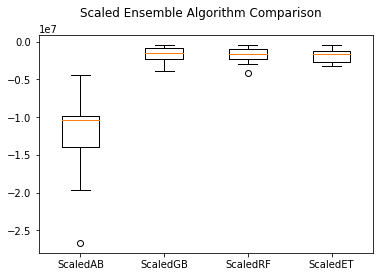

In [0]:
# Compare Algorithms 
fig = plt.figure() 
fig.suptitle('Scaled Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()


### Tune Ensemble Algorithms

In [0]:
# Tune Gradient Boosting
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators = np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(param_grid= param_grid,estimator = model,scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)
print('Best : %f using %s'%(grid_result.best_score_,grid_result.best_params_))
means = grid_result.grid_result.cv_results_['mean_test_score']
stds = grid_result.grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
  print('%f (%f) with : %f'%(mean,stdev,param))

AttributeError: ignored

In [0]:
print('Best : %f using %s'%(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
  print('%f (%f) with : %f'%(mean,stdev,param['n_estimators']))

Best : -1667298.225415 using {'n_estimators': 250}
-1880247.658159 (1155523.694606) with : 50.000000
-1683210.601106 (994897.581614) with : 100.000000
-1676005.021460 (983058.440511) with : 150.000000
-1668336.879093 (966287.607846) with : 200.000000
-1667298.225415 (959515.996703) with : 250.000000
-1677189.739482 (958220.297722) with : 300.000000
-1688301.983428 (966450.670182) with : 350.000000
-1690752.002880 (965375.142048) with : 400.000000


In [0]:
# Prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(n_estimators=250)
model.fit(rescaledX,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation,predictions))

2068153.3886402142


### Predictions 

In [0]:
filename = 'test_8i3B3FC.csv'
test_data = read_csv('drive/My Drive/Projects/Predict no of #upvotes/Data/'+filename)

In [0]:
test_data.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [0]:
from pandas import DataFrame
test = DataFrame()
test['ID'] = test_data['ID']
test_data = test_data.drop('ID',axis=1)

In [0]:
test_data['Tag_e'] = le.transform(test_data.Tag.values)

In [0]:
test_data = test_data.drop('Tag',axis=1)

In [0]:
rescaledValidationX = scaler.transform(test_data)
predictions = model.predict(test_data)


In [0]:
from pandas import Series
test['Upvotes'] = Series(predictions)

In [0]:
filename= 'submission.csv'
test.to_csv('drive/My Drive/Projects/Predict no of #upvotes/Data/'+ filename)

In [0]:
%pwd

'/content'